## Understanding the multivariate dataset

In [1]:
import matplotlib.pyplot as plt
from typing import List

Import the data from the dataset into a matrix of the features and a list of the categories associated with each record

In [2]:
def getData():
    features: List[List[float]] = []
    labels: List[int] = []
    
    with open("./wine.data", "r") as f:
        for line in f.readlines():
            # Split the line by commas
            record: list = line.strip().split(",")
            if not record: continue

            # Update the features and labels
            features.append(list(map(float, record[1:])))
            labels.append(int(record[0]))

    return features, labels

In [3]:
matrix, labels = getData()

xaxis1 = []; yaxis1 = []
xaxis2 = []; yaxis2 = []
xaxis3 = []; yaxis3 = []

Select the two features to visualize in the $x$ and $y$ variables

In [4]:
x = 0 # Alcohol
y = 1 # Malic Acid

Generate the sets of coordinates for the two attributes $(x,y)$ of the three categories (classes) of the dataset

In [5]:
for i, label in enumerate(labels):
    if label == 1:
        xaxis1.append(matrix[i][x])
        yaxis1.append(matrix[i][y])
    elif label == 2:
        xaxis2.append(matrix[i][x])
        yaxis2.append(matrix[i][y])
    elif label == 3:
        xaxis3.append(matrix[i][x])
        yaxis3.append(matrix[i][y])

Plot the three categories (classes) into a scatter plot

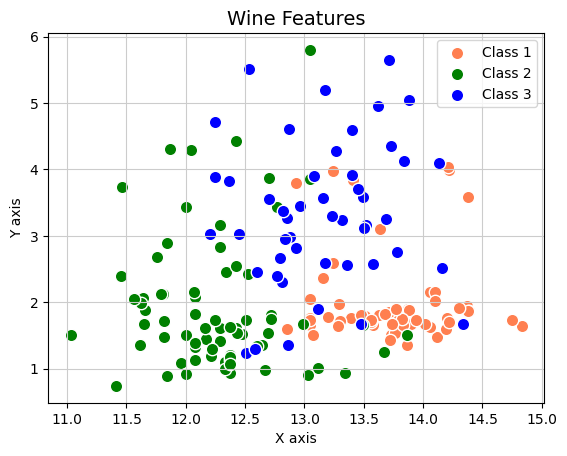

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
type1 = ax.scatter(xaxis1, yaxis1, s=80, c='coral', edgecolors='w')
type2 = ax.scatter(xaxis2, yaxis2, s=80, c='green', edgecolors='w')
type3 = ax.scatter(xaxis3, yaxis3, s=80, c='blue' , edgecolors='w')
 
ax.set_title('Wine Features', fontsize=14)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.legend([type1, type2, type3], ["Class 1", "Class 2", "Class 3"], loc=1)
 
ax.grid(True, linestyle='-', color='0.80')
 
plt.show()

## Dimensionality reduction

#### Principal Component Analysis (PCA)

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
wine: np.ndarray = np.loadtxt("./wine.data", delimiter=",")
wine.shape

(178, 14)

Select some features for axis $\textbf{X}$, and the class (which is the feature) for axis $\textbf{Y}$

In [9]:
x: np.ndarray = wine[:, 1:4]
y: np.ndarray = wine[:, 0].astype(np.int_)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x[:2]

x shape: (178, 3)
y shape: (178,)


array([[14.23,  1.71,  2.43],
       [13.2 ,  1.78,  2.14]])

Create a new instance of `PCA`, and train the algorithm with selected features in `x`. Then, apply the dimensionality reduction to the features in the `x` variable, and turn it into two-dimensional subspace

In [10]:
pca = PCA(n_components=2, random_state=0)
pca.fit(x)
z = pca.transform(x)

print(f"z shape: {z.shape}")

z shape: (178, 2)


Visualize the scatter plot of the new two-dimensional subspace

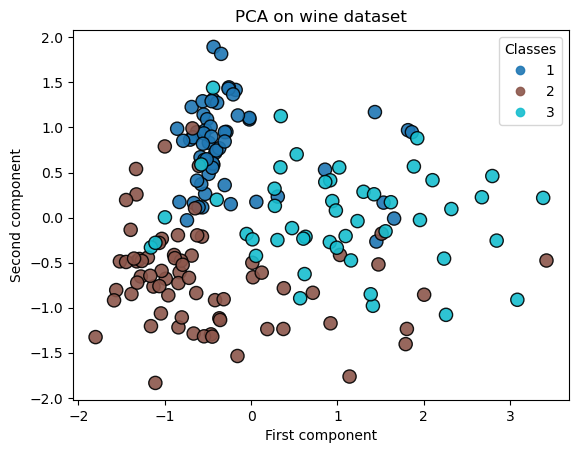

In [11]:
fig1 = plt.figure(1)
title = plt.title("PCA on wine dataset")
plot = plt.scatter(z[:, 0], z[:, 1], c=y,s=90, cmap=cm.tab10, 
                   alpha=0.9, edgecolors='k')
labx = plt.xlabel("First component")
laby = plt.ylabel("Second component")
plt.legend(*plot.legend_elements(), title="Classes")
plt.show()

## Getting started with SVM

In [12]:
# Import SVM from sklearn
from sklearn.svm import SVC

Create a new instance of `SVM` and define the kernel type as `linear`

In [13]:
svm = SVC(kernel='rbf')

Train the algorithm with two-dimensional space in the variable `z` and the class that is stored in the variable `y`

In [14]:
svm.fit(z, y)

SVC()

Create a grid where `svm` will perform the predictions in order to visualize the result

In [15]:
xmin, xmax = z[:,0].min()-0.1, z[:,0].max()+0.1
ymin, ymax = z[:,1].min()-0.1, z[:,1].max()+0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]

In [16]:
# Return the prediction for each point in the grid
result = svm.predict(grid)

Visualize the predictions in a scatter plot

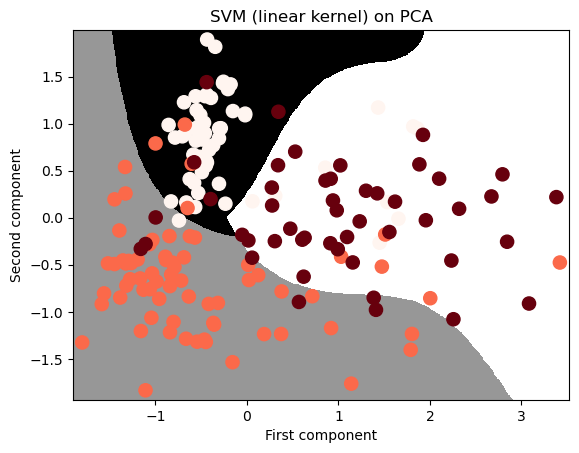

In [17]:
fig2 = plt.figure(2)
title = plt.title("SVM (linear kernel) on PCA")
plot1 = plt.pcolormesh(xx, yy, result.reshape(xx.shape), cmap = cm.Greys_r)
plot2 = plt.scatter(z[:, 0], z[:, 1], c=y, s=90, cmap = cm.Reds)
labx = plt.xlabel("First component")
laby = plt.ylabel("Second component")
limx = plt.xlim(xmin, xmax)
limy = plt.ylim(ymin, ymax)
plt.show()